In [1]:
import pandas as pd

In [2]:
ac_rule_1_tr = pd.read_csv(r"../artifacts\data_preprocessing\BRCA\ac_rule_1.tsv", sep="\t" , header=None , names=["label" , "support" , "confidence" , "rules" , "interestingness"])
ac_rule_1_te = pd.read_csv(r"../artifacts\data_preprocessing\BRCA\ac_rule_1_te.tsv", sep="\t" , header=None , names=["label" , "support" , "confidence" , "rules" , "interestingness"])

In [3]:
# get top 50 rules based on interestingness for each label 
grouped_top50_tr = ac_rule_1_tr.groupby("label").apply(lambda x: x.nlargest(50, "interestingness")).reset_index(drop=True)
grouped_top50_te = ac_rule_1_te.groupby("label").apply(lambda x: x.nlargest(50, "interestingness")).reset_index(drop=True)

C:\Users\tchia\AppData\Local\Temp\ipykernel_16268\1642498320.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_top50_tr = ac_rule_1_tr.groupby("label").apply(lambda x: x.nlargest(50, "interestingness")).reset_index(drop=True)
C:\Users\tchia\AppData\Local\Temp\ipykernel_16268\1642498320.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_top50_te = ac_rule_1_te.groupby("label").apply(lambda

In [49]:
# Loop for each group and summary the unique antecedent count of the rules
class_summary_tr = {}

for label in grouped_top50_tr["label"].unique():
    filtered = grouped_top50_tr[grouped_top50_tr["label"] == label]
    
    class_summary_tr[label] = {}
    
    for idx , row in filtered.iterrows():
        antecedents = [x.split(":")[0] for x in row["rules"].split(",")]
        
        for antecedent in antecedents:
            if antecedent not in class_summary_tr[label]:
                class_summary_tr[label][antecedent] = 1
            else:
                class_summary_tr[label][antecedent] += 1

class_summary_te = {}         
for label in grouped_top50_te["label"].unique():
    filtered = grouped_top50_te[grouped_top50_tr["label"] == label]
    
    class_summary_te[label] = {}
    
    for idx , row in filtered.iterrows():
        antecedents = [x.split(":")[0] for x in row["rules"].split(",")]
        
        for antecedent in antecedents:
            if antecedent not in class_summary_te[label]:
                class_summary_te[label][antecedent] = 1
            else:
                class_summary_te[label][antecedent] += 1

In [50]:
# print the summary
for key in class_summary_tr.keys():
    print(f"Train | Class {key} has {len(class_summary_tr[key].keys())} unique antecedents")
    
for key in class_summary_te.keys():
    print(f"Train | Class {key} has {len(class_summary_te[key].keys())} unique antecedents")
    
# print common antecedents between classes


Train | Class 0.0 has 174 unique antecedents
Train | Class 1.0 has 719 unique antecedents
Train | Class 2.0 has 647 unique antecedents
Train | Class 3.0 has 511 unique antecedents
Train | Class 4.0 has 871 unique antecedents
Train | Class 0.0 has 242 unique antecedents
Train | Class 1.0 has 840 unique antecedents
Train | Class 2.0 has 616 unique antecedents
Train | Class 3.0 has 486 unique antecedents
Train | Class 4.0 has 959 unique antecedents


<Axes: >

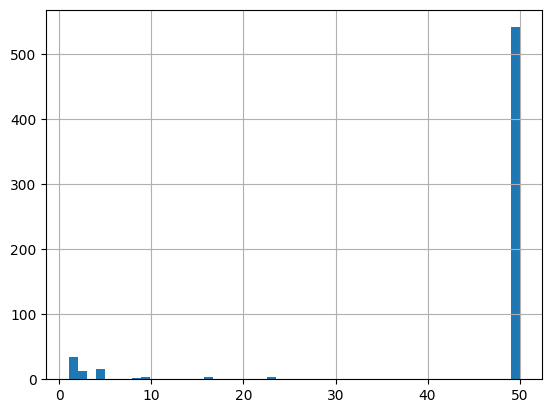

In [63]:
pd.Series(class_summary_te[2.0].values()).hist(bins=50)

In [60]:
intersection_genes_set = {}
for key in class_summary_tr.keys():
    # find intersection between classes
    intersection = set(class_summary_tr[key].keys()).intersection(class_summary_te[key].keys())
    print(f"Class {key} has {len(intersection)} common antecedents between train and test")
    intersection_genes_set[key] = intersection
    
print()
# print the common antecedents among the classes 
for key in intersection_genes_set.keys():
    print(f"Class {key} : {[ 0 if x == key else int(len(intersection_genes_set[x].intersection(intersection_genes_set[key]))/len(intersection_genes_set[x])*100)  for x in intersection_genes_set.keys() ]}")
    
# print the common antecedents among the classes 
print()
for key in intersection_genes_set.keys():
    print(f"Class {key} : {[ 0 if x == key else len(intersection_genes_set[x].intersection(intersection_genes_set[key])) for x in intersection_genes_set.keys() ]}")

Class 0.0 has 123 common antecedents between train and test
Class 1.0 has 635 common antecedents between train and test
Class 2.0 has 505 common antecedents between train and test
Class 3.0 has 344 common antecedents between train and test
Class 4.0 has 845 common antecedents between train and test

Class 0.0 : [0, 12, 2, 3, 12]
Class 1.0 : [62, 0, 78, 83, 68]
Class 2.0 : [10, 62, 0, 77, 55]
Class 3.0 : [10, 45, 52, 0, 36]
Class 4.0 : [86, 90, 92, 90, 0]

Class 0.0 : [0, 77, 13, 13, 106]
Class 1.0 : [77, 0, 398, 286, 576]
Class 2.0 : [13, 398, 0, 266, 468]
Class 3.0 : [13, 286, 266, 0, 310]
Class 4.0 : [106, 576, 468, 310, 0]


In [64]:
te = pd.read_csv(r"../artifacts\data_preprocessing\BRCA\labels_te.csv", sep="\t" , header=None)
tr = pd.read_csv(r"../artifacts\data_preprocessing\BRCA\labels_tr.csv", sep="\t" , header=None)

In [65]:
print(te.groupby(0).size())
print(tr.groupby(0).size())

0
0.0     44
1.0     10
2.0    122
3.0     45
4.0     10
dtype: int64
0
0.0     86
1.0     36
2.0    297
3.0     95
4.0     24
dtype: int64


In [4]:
# load pickle file KBinsDiscretizer
import pickle

with open(r"../artifacts\data_preprocessing\BRCA\kbins_1.joblib", "rb") as file:
    est = pickle.load(file)
    
# load test data
omic_1_te = pd.read_csv(r"../artifacts\data_preprocessing\BRCA\1_te.csv", header=None)
# Discritize the test data
omic_1_te = pd.DataFrame(est.transform(omic_1_te) , columns=omic_1_te.columns)

In [7]:
testing_model = {}

for label in grouped_top50_te["label"].unique():
    filtered = grouped_top50_te[grouped_top50_te["label"] == label]
    
    testing_model[label] = []
    
    for idx , row in filtered.iterrows():
        rules = set(row["rules"].split(","))
        testing_model[label].append(rules)
        
        

In [32]:
import numpy as np
classification_summary = []
for idx , row in omic_1_te.iterrows():
    # test each rules 
    sample = set([f"{x[0]}:{x[1]}" for x in list(zip(row.index , row.values))])
    # print(sample)
    # print(testing_model[0.0][0])
    # print(len(testing_model[0.0][0].intersection(sample)))
    # print(len(testing_model[0.0][0]))
    summary = {}
    for label in testing_model.keys():
        summary[label] = []
        
        for rule in testing_model[label]:
            insersection_set = rule.intersection(sample)
            summary[label].append(len(insersection_set)/len(rule))
            
        summary[label] = np.mean(summary[label])
    
    # select max value key
    summary['prediction'] = max(summary, key=summary.get)
    summary['sample'] = idx
    classification_summary.append(summary)
    #print(summary)


In [34]:
df_prediction = pd.DataFrame(classification_summary)
df_prediction

,0.0,1.0,2.0,3.0,4.0,prediction,sample
0,0.984438,0.972336,0.962903,0.964840,0.957914,0.0,0
1,0.986221,0.994100,1.000000,0.997803,0.998516,2.0,1
2,0.897539,0.975734,0.998172,0.997803,0.983642,2.0,2
3,0.979400,0.991205,0.998172,0.997803,0.994531,2.0,3
4,0.979266,0.980019,0.988816,0.997803,0.976421,3.0,4
...,...,...,...,...,...,...,...
226,0.994021,0.938194,0.921334,0.937436,0.937757,0.0,226
227,0.917734,0.981056,1.000000,0.995605,0.985830,2.0,227
228,0.958529,0.987735,1.000000,0.999912,0.986391,2.0,228
229,0.992773,0.989196,0.999927,0.997803,0.996630,2.0,229


In [35]:
label = pd.read_csv(r"..\artifacts\data_preprocessing\BRCA\labels_te.csv" , header=None)

In [37]:
from sklearn.metrics import classification_report

print(classification_report(label , df_prediction["prediction"]))

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88        44
         1.0       1.00      0.60      0.75        10
         2.0       0.86      0.96      0.91       122
         3.0       0.89      0.76      0.82        45
         4.0       0.75      0.30      0.43        10

    accuracy                           0.87       231
   macro avg       0.87      0.70      0.76       231
weighted avg       0.87      0.87      0.86       231

